# 🩺 Diabetes Readmission Prediction
This project predicts early hospital readmission (within 30 days) for diabetic patients using machine learning models. The dataset comes from a large US hospital over a span of 10 years.

### Objectives
- Clean and preprocess data
- Engineer new features for better predictive power
- Train and evaluate several classification models
- Compare models and save the best one

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

## 🔍 Load and Explore the Dataset

In [2]:
# Load dataset
data = pd.read_csv(r"C:\Users\Abd-Allah\Downloads\Compressed\diabetes+130-us+hospitals+for+years+1999-2008\diabetic_data.csv")

# Display shape and a sample
print("Dataset shape:", data.shape)
data.sample(10)

Dataset shape: (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
88437,284275296,40995693,Caucasian,Male,[70-80),?,1,3,7,6,...,No,Up,No,No,No,No,No,Ch,Yes,NO
44591,137522910,108956583,Hispanic,Male,[30-40),?,2,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,NO
68260,192557982,99220689,Caucasian,Female,[80-90),?,5,6,1,10,...,No,No,No,No,No,No,No,No,No,>30
58272,165289770,29401542,AfricanAmerican,Male,[60-70),?,1,1,7,3,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
57142,163384038,63270738,Caucasian,Male,[80-90),?,2,1,1,2,...,No,No,No,No,No,No,No,Ch,Yes,>30
88625,285257202,40164507,AfricanAmerican,Female,[70-80),?,3,1,1,1,...,No,No,No,No,No,No,No,No,No,NO
48952,148771104,97577100,Caucasian,Male,[70-80),?,1,1,7,3,...,No,No,No,No,No,No,No,No,No,>30
95603,363799004,41788683,Caucasian,Female,[80-90),?,1,3,7,1,...,No,Steady,No,No,No,No,No,No,Yes,>30
97742,392531072,127881797,Caucasian,Male,[70-80),?,8,1,1,4,...,No,No,No,No,No,No,No,No,Yes,NO
50848,152305308,101106342,Caucasian,Male,[40-50),?,1,2,7,1,...,No,No,No,No,No,No,No,No,Yes,NO


In [3]:
# Basic info and missing values
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [4]:
# Check for '?' placeholders
data.isin(["?"]).sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

## 🧹 Data Cleaning and Preprocessing

In [5]:
# Replace placeholders
data['race'].replace('?', 'Unknown', inplace=True)
data['payer_code'].replace('?', 'Unknown', inplace=True)
data['medical_specialty'].replace('?', 'Unknown', inplace=True)

# Handle weight >200 values and convert ranges to numerical
data['weight'] = data['weight'].replace('>200', '[200-200)').str.extract(r'\[(\d+)-(\d+)\)').astype(float).mean(axis=1)

# Convert age range to average numerical age
data['age'] = data['age'].str.extract(r'\[(\d+)-(\d+)\)').astype(int).mean(axis=1).astype(int)

In [6]:
# Clean diagnosis codes
def clean_diag(x):
    if x == '?':
        return 0
    x = ''.join(c for c in str(x) if c.isdigit() or c == '.')
    return int(float(x)) if x else 0

# Apply cleaning
for col in ['diag_1', 'diag_2', 'diag_3']:
    data[col] = data[col].apply(clean_diag)

## 🏗️ Feature Engineering

In [7]:
# Add new features
data['total_diagnoses'] = data[['diag_1', 'diag_2', 'diag_3']].apply(lambda x: sum(x > 0), axis=1)
data['total_procedures'] = data['num_lab_procedures'] + data['num_procedures']
data['service_intensity'] = data['total_procedures'] / data['time_in_hospital']
data['medication_intensity'] = data['num_medications'] / data['time_in_hospital']

# Binary target variable
data['readmitted'] = (data['readmitted'] == '<30').astype(int)
data.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,total_diagnoses,total_procedures,service_intensity,medication_intensity
58426,165592326,26471934,AfricanAmerican,Female,85,NaN,1,1,7,7,...,No,No,No,Ch,Yes,0,3,55,7.857143,2.714286
42604,131348118,61613208,Caucasian,Female,95,NaN,2,3,1,6,...,No,No,No,Ch,Yes,1,3,9,1.500000,1.166667
28963,94862124,17353728,Caucasian,Male,55,NaN,2,1,1,1,...,No,No,No,No,No,0,3,35,35.000000,1.000000
66247,184888044,57351096,Caucasian,Male,55,NaN,1,1,7,9,...,No,No,No,Ch,Yes,0,3,70,7.777778,2.333333
52435,155214324,55889046,AfricanAmerican,Female,45,NaN,2,1,1,7,...,No,No,No,Ch,Yes,0,3,22,3.142857,1.142857


## 🧠 Model Training and Evaluation

In [8]:
# Feature selection
features = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications',
            'number_diagnoses', 'race', 'gender', 'total_diagnoses',
            'total_procedures', 'service_intensity', 'medication_intensity']
target = 'readmitted'

X = data[features]
y = data[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [9]:
# Pipelines
numeric_features = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_medications',
                    'number_diagnoses', 'total_diagnoses', 'total_procedures',
                    'service_intensity', 'medication_intensity']
categorical_features = ['race', 'gender']

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, numeric_features),
    ('cat', cat_pipeline, categorical_features)
])

In [10]:
# Train Random Forest
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', n_estimators=100, max_depth=10, random_state=42))
])

model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.5591
              precision    recall  f1-score   support

           0       0.91      0.56      0.69     18083
           1       0.14      0.56      0.22      2271

    accuracy                           0.56     20354
   macro avg       0.52      0.56      0.46     20354
weighted avg       0.82      0.56      0.64     20354



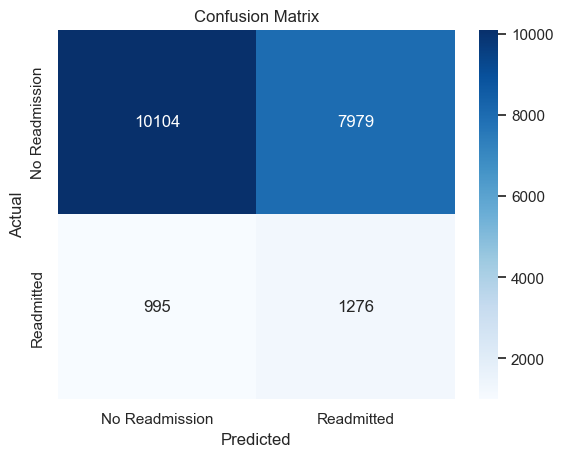

In [11]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Readmission', 'Readmitted'],
            yticklabels=['No Readmission', 'Readmitted'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print(f"CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

CV Accuracy: 0.5698 ± 0.0546


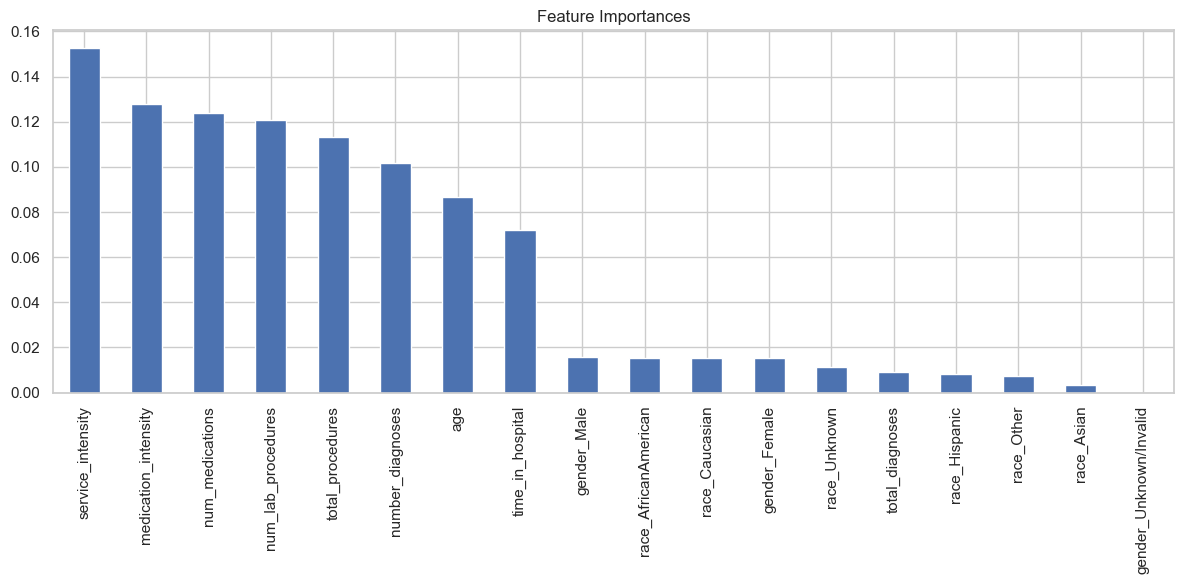

In [13]:
# Feature Importance
importances = model.named_steps['classifier'].feature_importances_
feature_names = model.named_steps['preprocessor'].transformers_[0][2] + list(
    model.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder']
    .get_feature_names_out(categorical_features))

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp.plot(kind='bar', figsize=(12,6), title="Feature Importances")
plt.tight_layout()
plt.show()

## 🔄 Model Comparison

In [19]:
# Define models
models = {
    "Random Forest": Pipeline([('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced'))]),
    "Logistic Regression": Pipeline([('preprocessor', preprocessor),
                                     ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))]),
    "Decision Tree": Pipeline([('preprocessor', preprocessor),
                               ('classifier', DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced'))]),
    "XGBoost": Pipeline([('preprocessor', preprocessor),
                         ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])
}

# Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Random Forest Accuracy: 0.5591
              precision    recall  f1-score   support

           0       0.91      0.56      0.69     18083
           1       0.14      0.56      0.22      2271

    accuracy                           0.56     20354
   macro avg       0.52      0.56      0.46     20354
weighted avg       0.82      0.56      0.64     20354


Logistic Regression Accuracy: 0.5066
              precision    recall  f1-score   support

           0       0.91      0.49      0.64     18083
           1       0.13      0.62      0.22      2271

    accuracy                           0.51     20354
   macro avg       0.52      0.56      0.43     20354
weighted avg       0.82      0.51      0.59     20354


Decision Tree Accuracy: 0.4207
              precision    recall  f1-score   support

           0       0.91      0.38      0.54     18083
           1       0.13      0.71      0.21      2271

    accuracy                           0.42     20354
   macro avg       0.52   

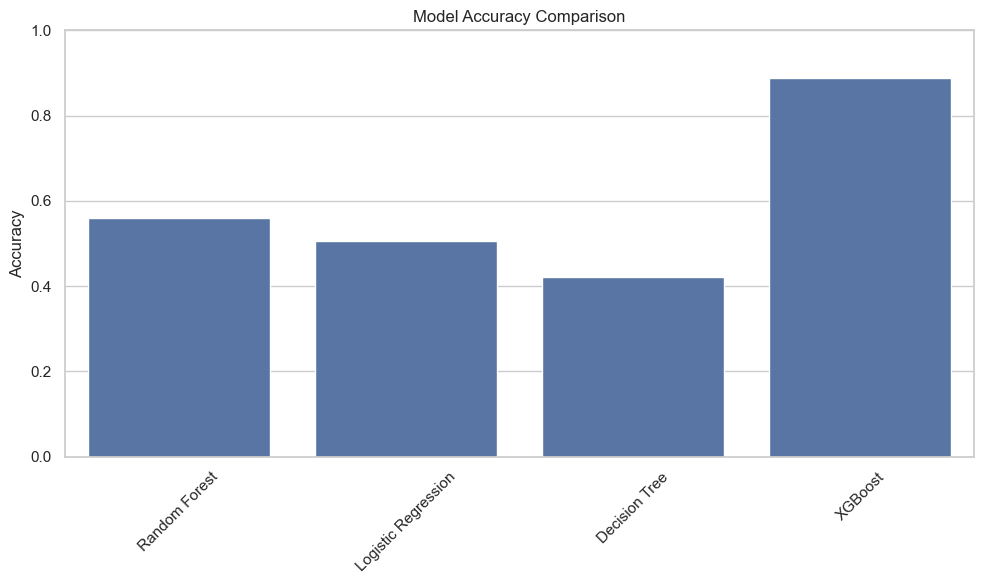

In [20]:
# Plot comparison
plt.figure(figsize=(10,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [21]:
joblib.dump(model, 'readmission_predictor.pkl')

['readmission_predictor.pkl']

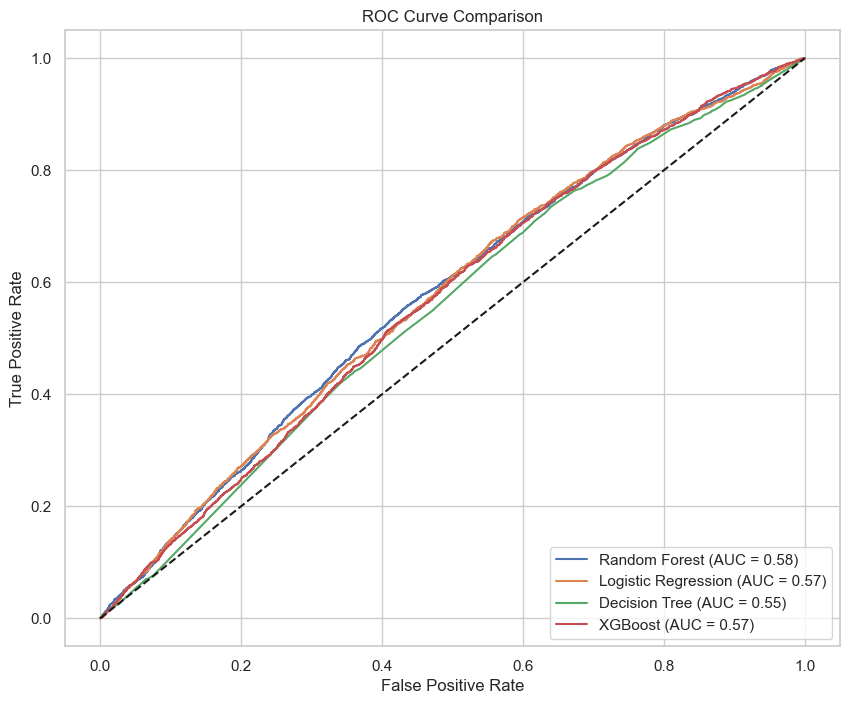

In [22]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))
    for name, model in models.items():
        if hasattr(model.named_steps['classifier'], "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        elif hasattr(model.named_steps['classifier'], "decision_function"):
            y_proba = model.decision_function(X_test)
        else:
            continue
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Example usage:
plot_roc_curves(models, X_test, y_test)


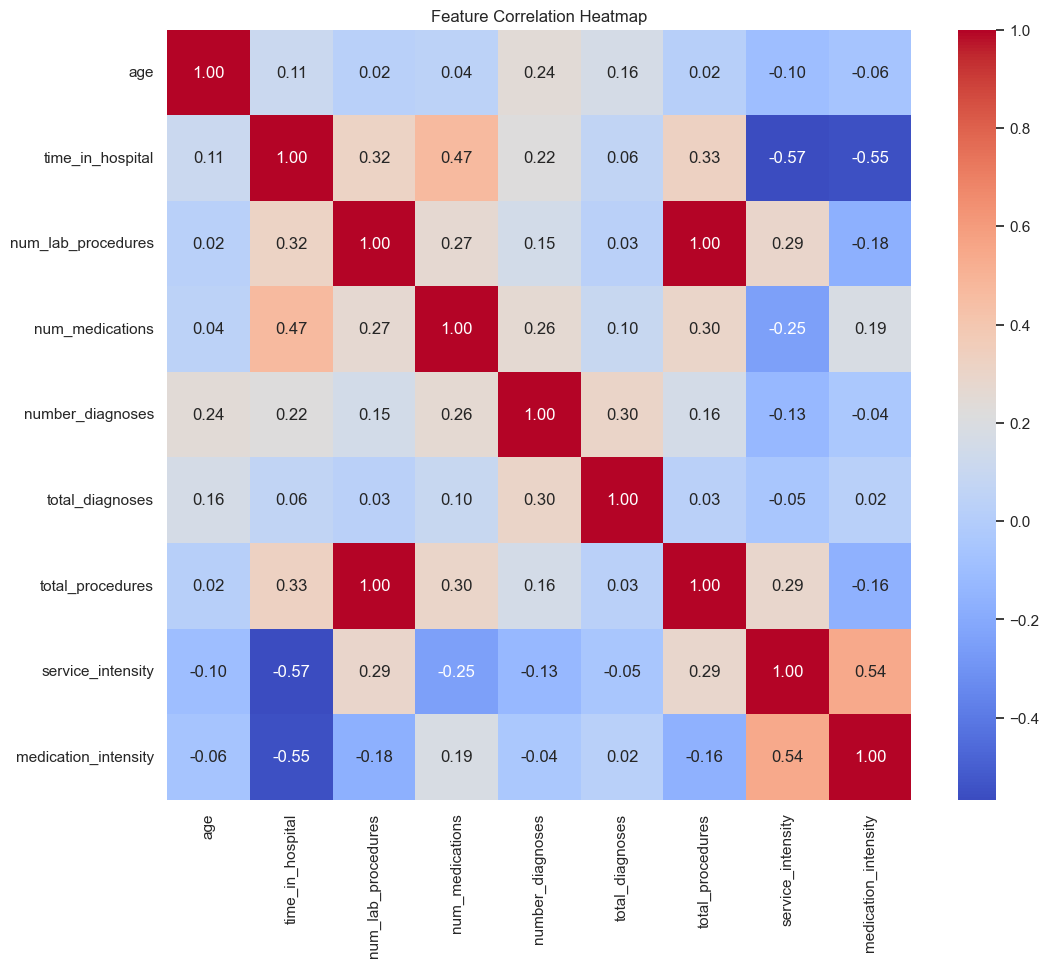

In [25]:
plt.figure(figsize=(12, 10))
corr_matrix = data[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
